In [10]:
#Bibliothek

import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
from PIL import Image  # Certifique-se de importar a classe Image


Min valor: 0, Max valor: 244


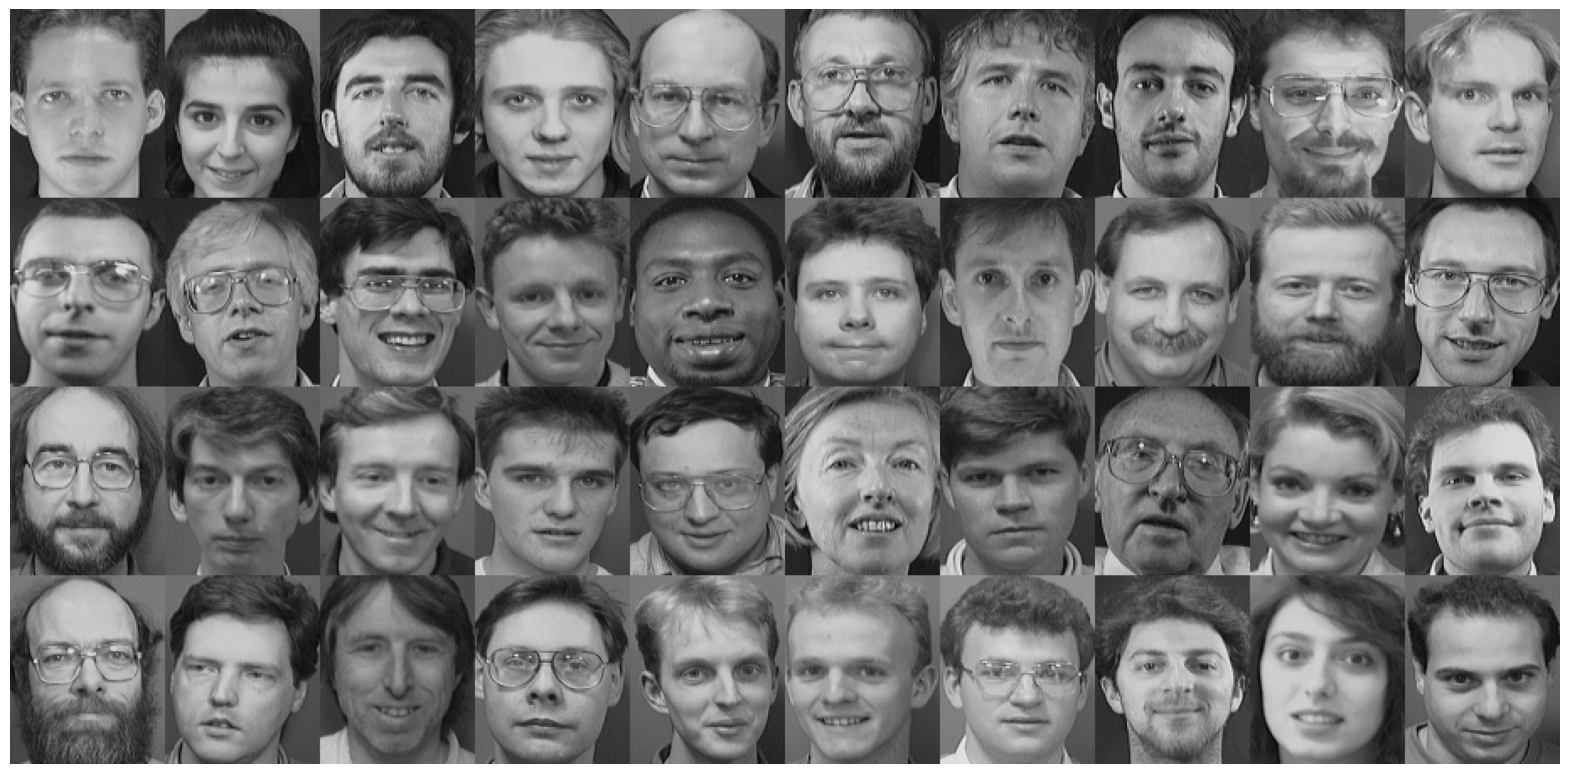

In [11]:
#LISTA 10 de cada pessoa
# Configuração dos parâmetros de plotagem
plt.rcParams['figure.figsize'] = [20, 15]  # Ajuste conforme necessário
plt.rcParams.update({'font.size': 10})

# Diretório das imagens
base_dir = './att_faces/orl_faces/'

# Obter as pastas de cada pessoa
person_folders = sorted([f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))])

# Definir o tamanho da imagem e a grade
num_people = len(person_folders)
image_size = (112, 92)  # As dimensões padrão das imagens do AT&T Faces Dataset

# Definir o número de imagens por linha
images_per_row = 10
num_rows = (num_people + images_per_row - 1) // images_per_row  # Calcula o número de linhas necessárias

# Inicializar a matriz para armazenar as imagens
allPersons = np.zeros((num_rows * image_size[0], images_per_row * image_size[1]), dtype=np.uint8)

for idx, person_folder in enumerate(person_folders):
    # Caminho para a pasta da pessoa
    person_path = os.path.join(base_dir, person_folder)
    
    # Obter a lista de imagens
    images = sorted([f for f in os.listdir(person_path) if f.endswith('.pgm')])
    
    if images:
        img_path = os.path.join(person_path, images[0])
        img = Image.open(img_path).convert('L')  # Converte a imagem para escala de cinza
        img_array = np.array(img)

        # Verificar dimensões da imagem
        if img_array.shape != image_size:
            raise ValueError(f"A imagem {img_path} tem dimensões {img_array.shape}, esperado {image_size}")

        # Calcular posição na matriz
        row = idx // images_per_row
        col = idx % images_per_row
        start_row = row * image_size[0]
        end_row = (row + 1) * image_size[0]
        start_col = col * image_size[1]
        end_col = (col + 1) * image_size[1]

        # Colocar a imagem na matriz final
        allPersons[start_row:end_row, start_col:end_col] = img_array

# Verificar o intervalo de valores da matriz
print(f"Min valor: {np.min(allPersons)}, Max valor: {np.max(allPersons)}")

# Plotar a imagem
plt.imshow(allPersons, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

Min valor: 0, Max valor: 251


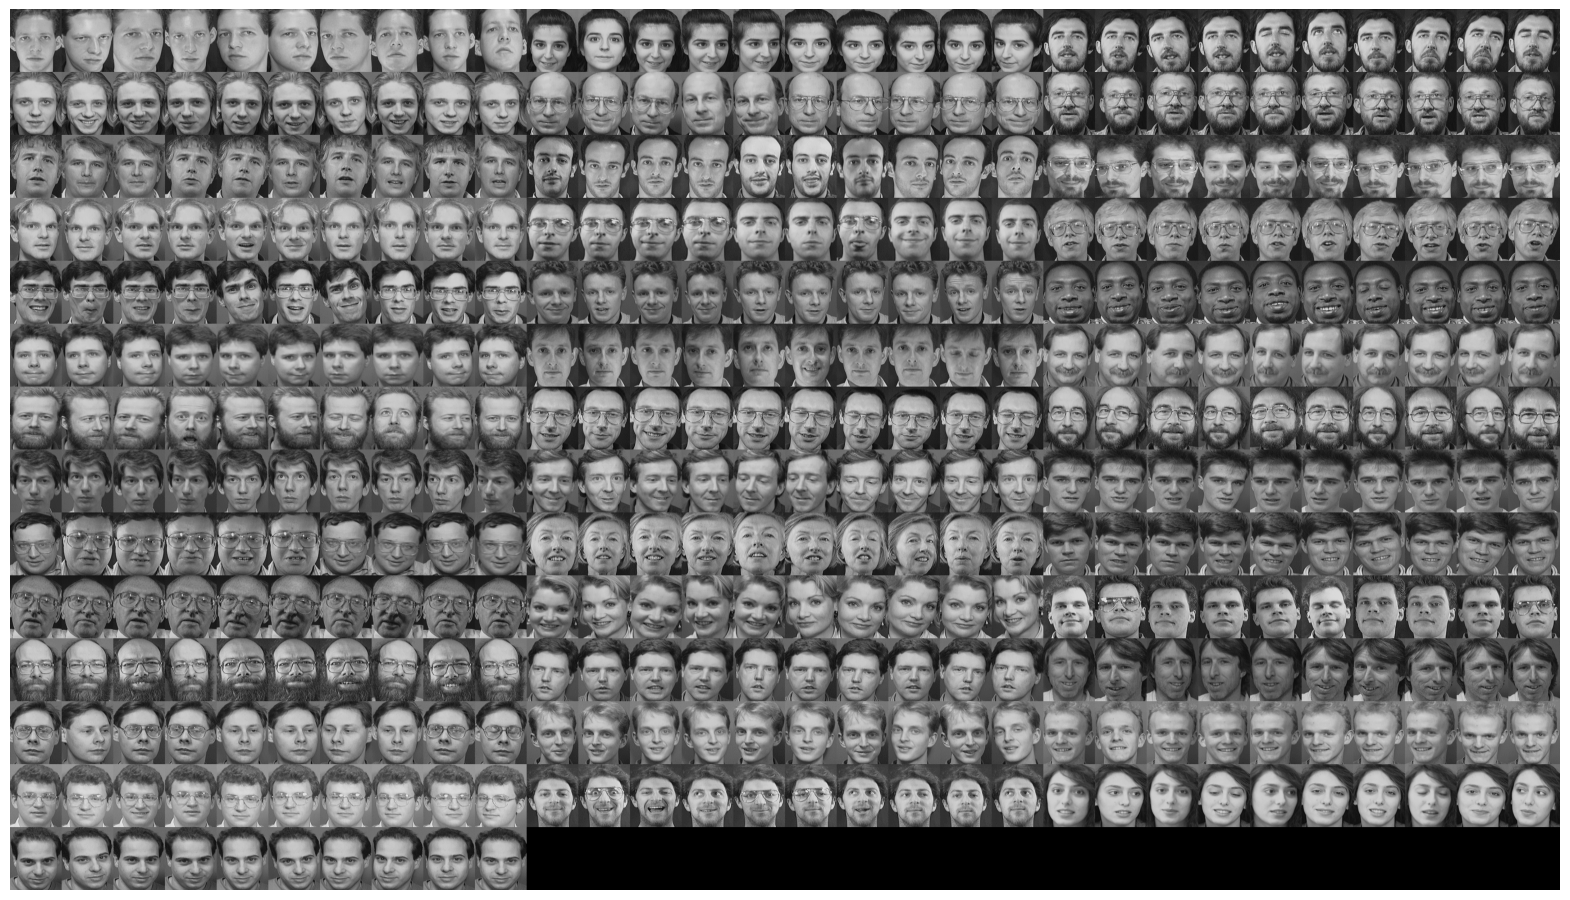

In [13]:
#PLOTA TODAS AS IMAGENS

# Configuração dos parâmetros de plotagem
plt.rcParams['figure.figsize'] = [20, 15]  # Ajuste conforme necessário
plt.rcParams.update({'font.size': 10})

# Diretório das imagens
base_dir = './att_faces/orl_faces/'

# Obter as pastas de cada pessoa
person_folders = sorted([f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))])

# Definir o tamanho da imagem e a grade
image_size = (112, 92)  # As dimensões padrão das imagens do AT&T Faces Dataset
images_per_row = 30  # Número de imagens por linha

# Inicializar a lista para armazenar as imagens
image_list = []

for person_folder in person_folders:
    # Caminho para a pasta da pessoa
    person_path = os.path.join(base_dir, person_folder)
    
    # Obter a lista de imagens
    images = sorted([f for f in os.listdir(person_path) if f.endswith('.pgm')])
    
    # Adicionar as imagens à lista
    for image_name in images[:10]:  # Pega as 10 primeiras imagens de cada pessoa
        img_path = os.path.join(person_path, image_name)
        img = Image.open(img_path).convert('L')  # Converte a imagem para escala de cinza
        img_array = np.array(img)
        
        # Verificar dimensões da imagem
        if img_array.shape != image_size:
            raise ValueError(f"A imagem {img_path} tem dimensões {img_array.shape}, esperado {image_size}")
        
        image_list.append(img_array)

# Calcular o número total de imagens
num_images = len(image_list)
num_rows = (num_images + images_per_row - 1) // images_per_row  # Calcula o número de linhas necessárias

# Inicializar a matriz para armazenar todas as imagens
allImages = np.zeros((num_rows * image_size[0], images_per_row * image_size[1]), dtype=np.uint8)

for idx, img_array in enumerate(image_list):
    row = idx // images_per_row
    col = idx % images_per_row
    start_row = row * image_size[0]
    end_row = (row + 1) * image_size[0]
    start_col = col * image_size[1]
    end_col = (col + 1) * image_size[1]

    # Colocar a imagem na matriz final
    allImages[start_row:end_row, start_col:end_col] = img_array

# Verificar o intervalo de valores da matriz
print(f"Min valor: {np.min(allImages)}, Max valor: {np.max(allImages)}")

# Plotar a imagem
plt.imshow(allImages, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [57]:
#CONSTRUIR EIGENFACES BASE FOR ALL IMAGES

# X = U SOMATORIO V ^T

# Carregar o arquivo .mat
mat_file_path = os.path.join('..', 'att_faces', 'orl_faces', 's')
mat_contents = scipy.io.loadmat(mat_file_path)

# Extrair variáveis do dicionário
faces = mat_contents['faces']
m = int(mat_contents['m'][0, 0])
n = int(mat_contents['n'][0, 0])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

# Usar as primeiras 30 pessoas para dados de treinamento
trainingFaces = faces[:, :np.sum(nfaces[:30])]
avgFace = np.mean(trainingFaces, axis=1)

# Computar eigenfaces com dados de treinamento subtraídos da média
X = trainingFaces - np.tile(avgFace, (trainingFaces.shape[1], 1)).T
U, S, VT = np.linalg.svd(X, full_matrices=False)

# Visualizar a média e o primeiro eigenface
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace, (m, n)).T, cmap='gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:, 0], (m, n)).T, cmap='gray')
plt.axis('off')

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '../att_faces/orl_faces/s1.mat'

import os
import scipy.io

base_path = './att_faces/orl_faces/'
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith('.mat'):
                mat_file_path = os.path.join(folder_path, filename)
                mat_contents = scipy.io.loadmat(mat_file_path)
                # Aqui você pode chamar a função des

In [60]:
import os
import scipy.io

base_path = './att_faces/orl_faces/'
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith('.mat'):
                mat_file_path = os.path.join(folder_path, filename)
                mat_contents = scipy.io.loadmat(mat_file_path)
                # Aqui você pode chamar a função des

# Extrair variáveis do dicionário
faces = mat_contents['faces']
m = int(mat_contents['m'][0, 0])
n = int(mat_contents['n'][0, 0])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

# Usar as primeiras 30 pessoas para dados de treinamento
trainingFaces = faces[:, :np.sum(nfaces[:30])]
avgFace = np.mean(trainingFaces, axis=1)

# Computar eigenfaces com dados de treinamento subtraídos da média
X = trainingFaces - np.tile(avgFace, (trainingFaces.shape[1], 1)).T
U, S, VT = np.linalg.svd(X, full_matrices=False)

# Visualizar a média e o primeiro eigenface
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace, (m, n)).T, cmap='gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:, 0], (m, n)).T, cmap='gray')
plt.axis('off')

plt.show()


TypeError: list indices must be integers or slices, not str

In [68]:
base_path = './att_faces/orl_faces/'
all_faces = []

# Processar cada pasta
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    if os.path.isdir(folder_path):
        # Processar cada arquivo .mat na pasta
        for filename in os.listdir(folder_path):
            if filename.endswith('.pgm'):
                mat_file_path = os.path.join(folder_path, filename)
                mat_contents = scipy.io.loadmat(mat_file_path)
                
                # Checar e extrair as variáveis do dicionário
                if 'faces' in mat_contents:
                    faces = mat_contents['faces']
                    m = int(mat_contents['m'][0, 0])
                    n = int(mat_contents['n'][0, 0])
                    nfaces = np.ndarray.flatten(mat_contents['nfaces'])

                    all_faces.append(faces)

# Concatenar todas as faces em uma matriz
all_faces = np.hstack(all_faces)

# Usar as primeiras 30 pessoas para dados de treinamento
num_people = 30
trainingFaces = all_faces[:, :np.sum(nfaces[:num_people])]
avgFace = np.mean(trainingFaces, axis=1)

# Computar eigenfaces
X = trainingFaces - np.tile(avgFace, (trainingFaces.shape[1], 1)).T
U, S, VT = np.linalg.svd(X, full_matrices=False)

# Visualizar a média e o primeiro eigenface
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace, (m, n)).T, cmap='gray')
plt.axis('off')
ax1.set_title('Average Face')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:, 0], (m, n)).T, cmap='gray')
plt.axis('off')
ax2.set_title('First Eigenface')

plt.show()

ValueError: Unknown mat file type, version 111, 114